# CH09 Forecast

In [1]:
options(repr.plot.width = 15, repr.plot.height = 8)

### 모의 실험 데이터

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



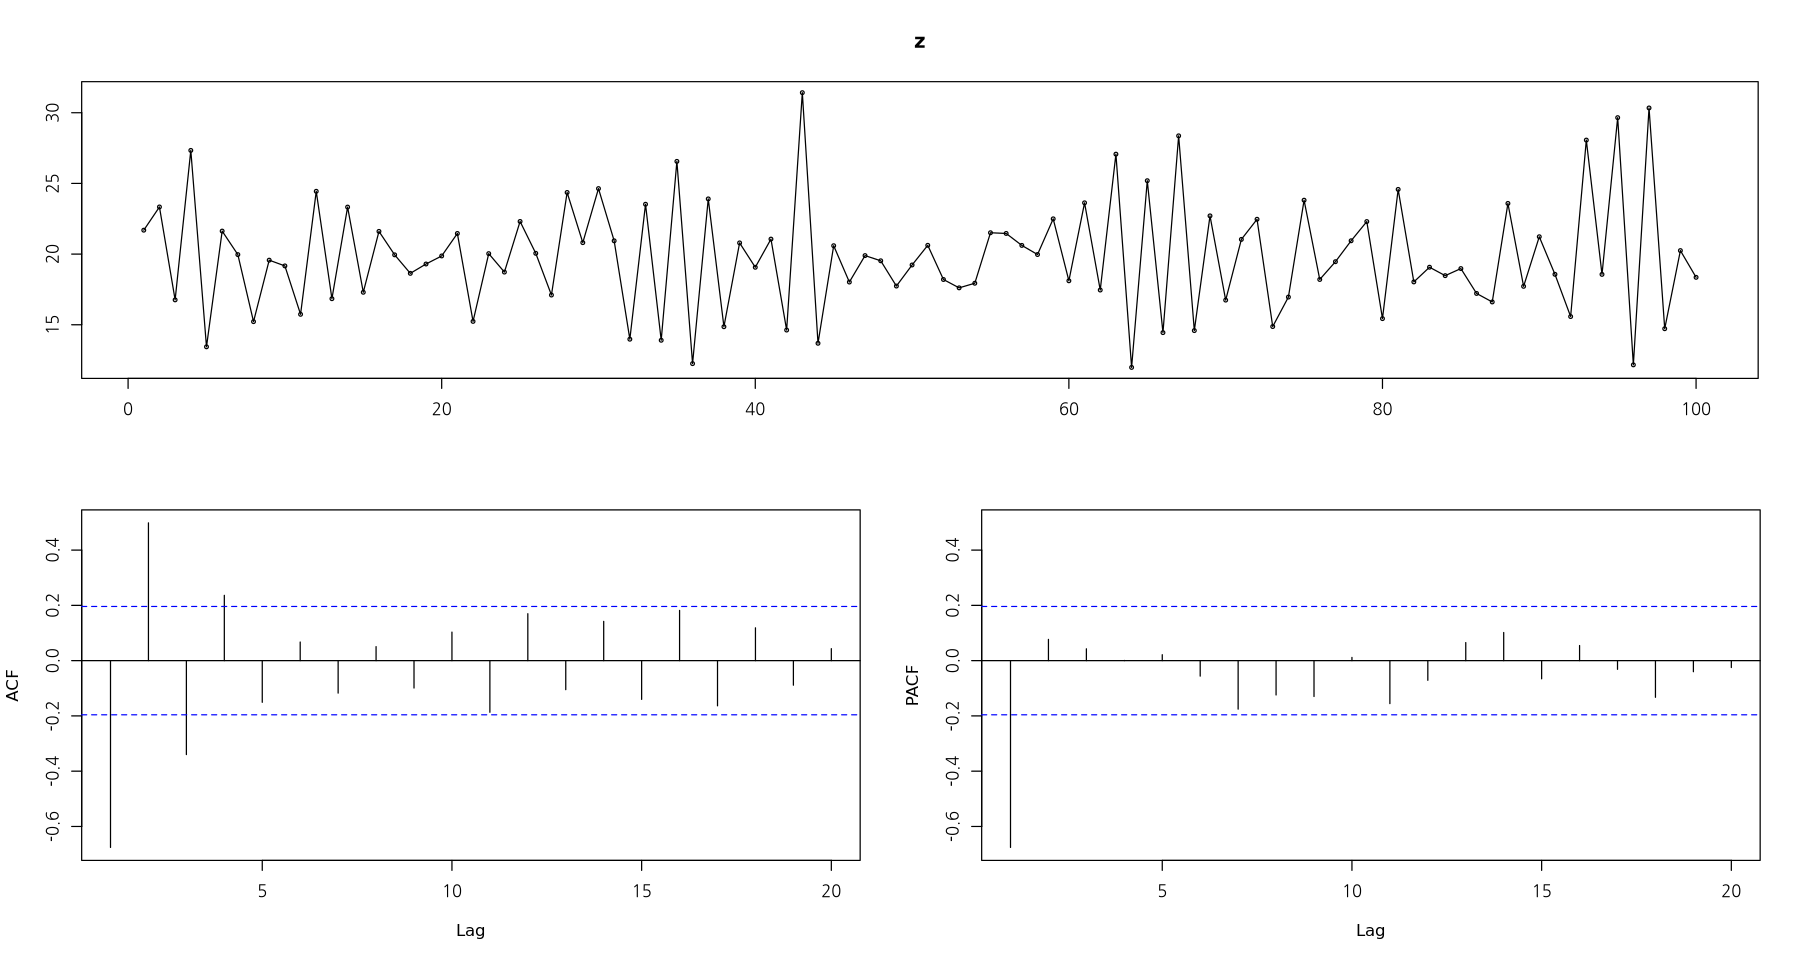

In [3]:
z <- scan("/root/TS2024/data/Time Series Data/eg8_7.txt")
forecast::tsdisplay(z)

`geom_smooth()` using formula = 'y ~ x'


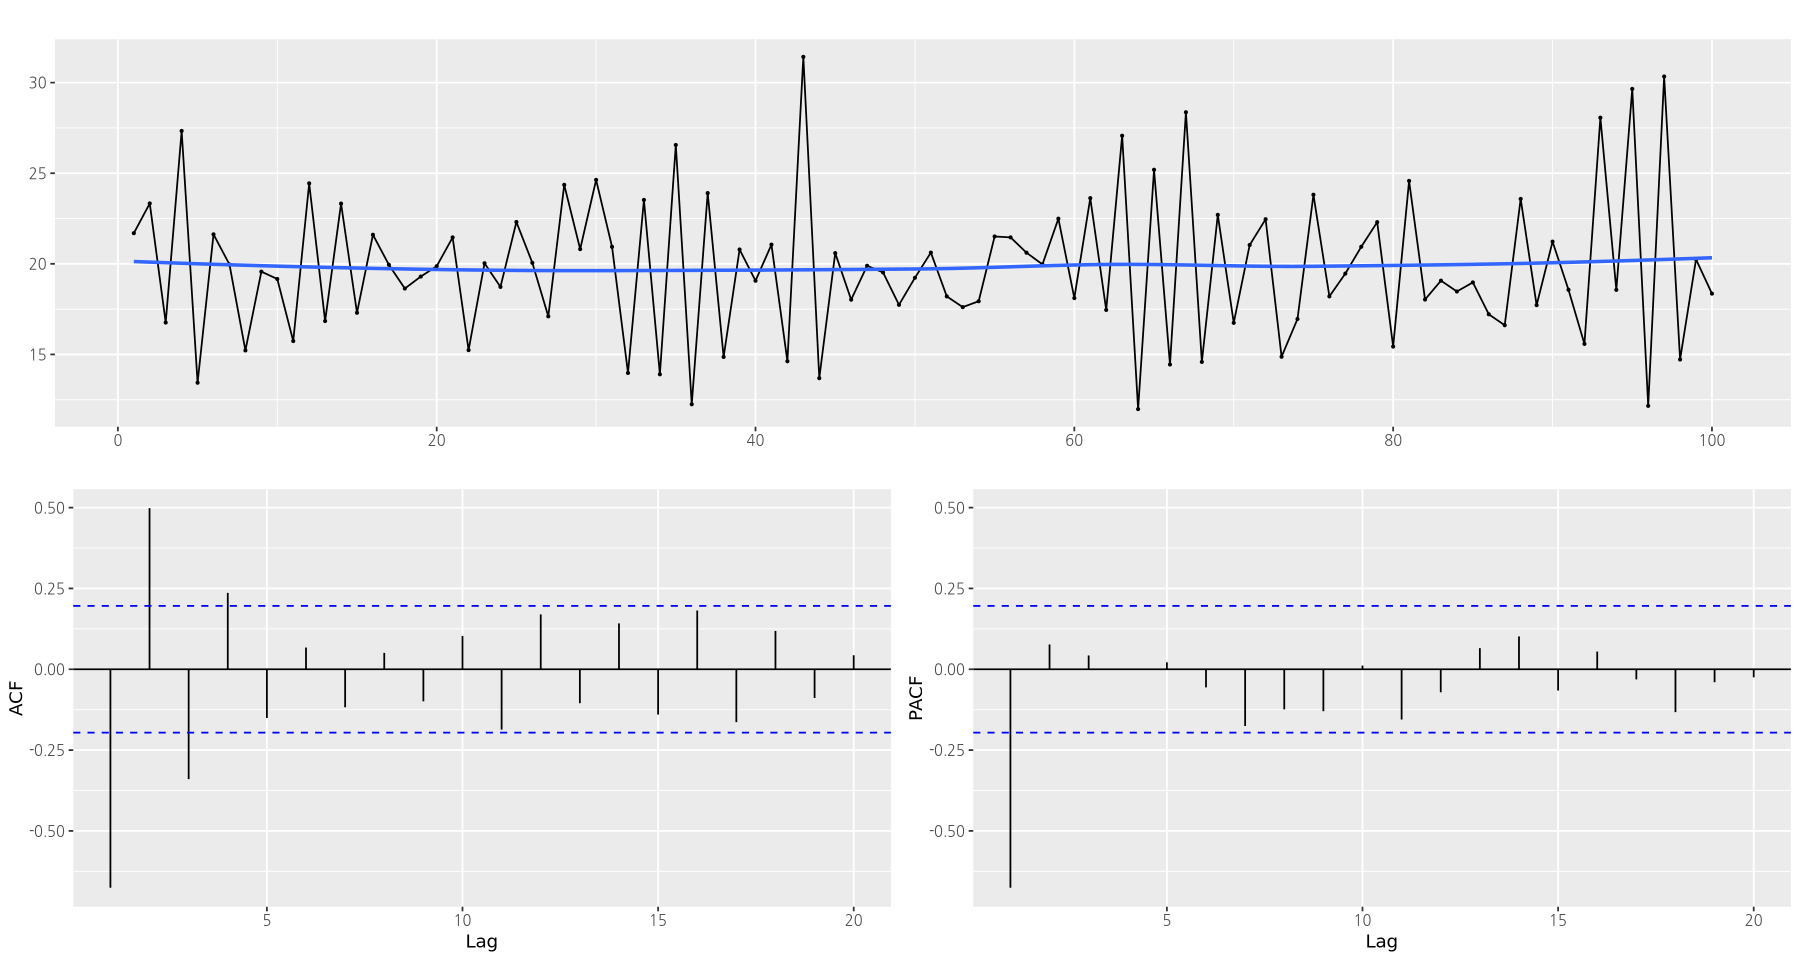

In [5]:
forecast::ggtsdisplay(z, smooth = T)

`-` AR(1) model 적합 : ACF가 지수적으로 감소 / PACF가 1시차만 유의

In [6]:
fit = arima(z, order = c(1, 0, 0), method = "ML")
fit


Call:
arima(x = z, order = c(1, 0, 0), method = "ML")

Coefficients:
          ar1  intercept
      -0.6715    19.8312
s.e.   0.0728     0.1776

sigma^2 estimated as 8.744:  log likelihood = -250.61,  aic = 507.22

In [7]:
mean(z) ## intercept는 그냥 절편임

[1] 19.83269

$\hat Z_n(l) = \hat \mu + \hat\phi^l(Z_n - \hat \mu)$

`-` forecasting

In [16]:
forecast_fit <- forecast::forecast(fit, 25) #MMSE : Zn(l) = mu + phi^l*(Zn-mu), l=1,...,10
forecast_fit

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
101       20.82225 17.03269 24.61181 15.02662 26.61788
102       19.16558 14.60082 23.73034 12.18439 26.14678
103       20.27811 15.40393 25.15229 12.82369 27.73253
104       19.53100 14.52353 24.53847 11.87273 27.18926
105       20.03272 14.96628 25.09915 12.28427 27.78116
106       19.69579 14.60299 24.78859 11.90702 27.48456
107       19.92205 14.81740 25.02670 12.11517 27.72893
108       19.77011 14.66013 24.88009 11.95507 27.58515
109       19.87214 14.75976 24.98453 12.05343 27.69086
110       19.80362 14.69015 24.91709 11.98325 27.62399
111       19.84964 14.73568 24.96359 12.02852 27.67076
112       19.81874 14.70456 24.93291 11.99728 27.64019
113       19.83949 14.72521 24.95376 12.01788 27.66110
114       19.82555 14.71123 24.93987 12.00387 27.64723
115       19.83491 14.72057 24.94925 12.01320 27.65662
116       19.82863 14.71428 24.94297 12.00690 27.65035
117       19.83285 14.71849 24.94720 12.01112 27.65457
118       

> 얼마나 예측할 것인지 라이브러리가 있음.
>
> 평균반응 예측값과 신뢰구간(개별 관측치)

In [10]:
coef(fit)

ar1  intercept 
-0.6715441 19.8311503

> $\phi$와 $\mu$에 대한 추정량

In [17]:
hat_phi <- coef(fit)[1]
hat_mu <- coef(fit)[2]

In [18]:
hat_mu + hat_phi * (z[100] - hat_mu) # l= 1 Z_100_(1)
hat_mu + hat_phi^2 * (z[100] - hat_mu) # l= 2 Z_100_(2)

intercept 
 20.82225

intercept 
 19.16558

$\hat Z_{100}(l) = \hat \mu + \hat \phi^l (Z_{100} - \hat \mu)$

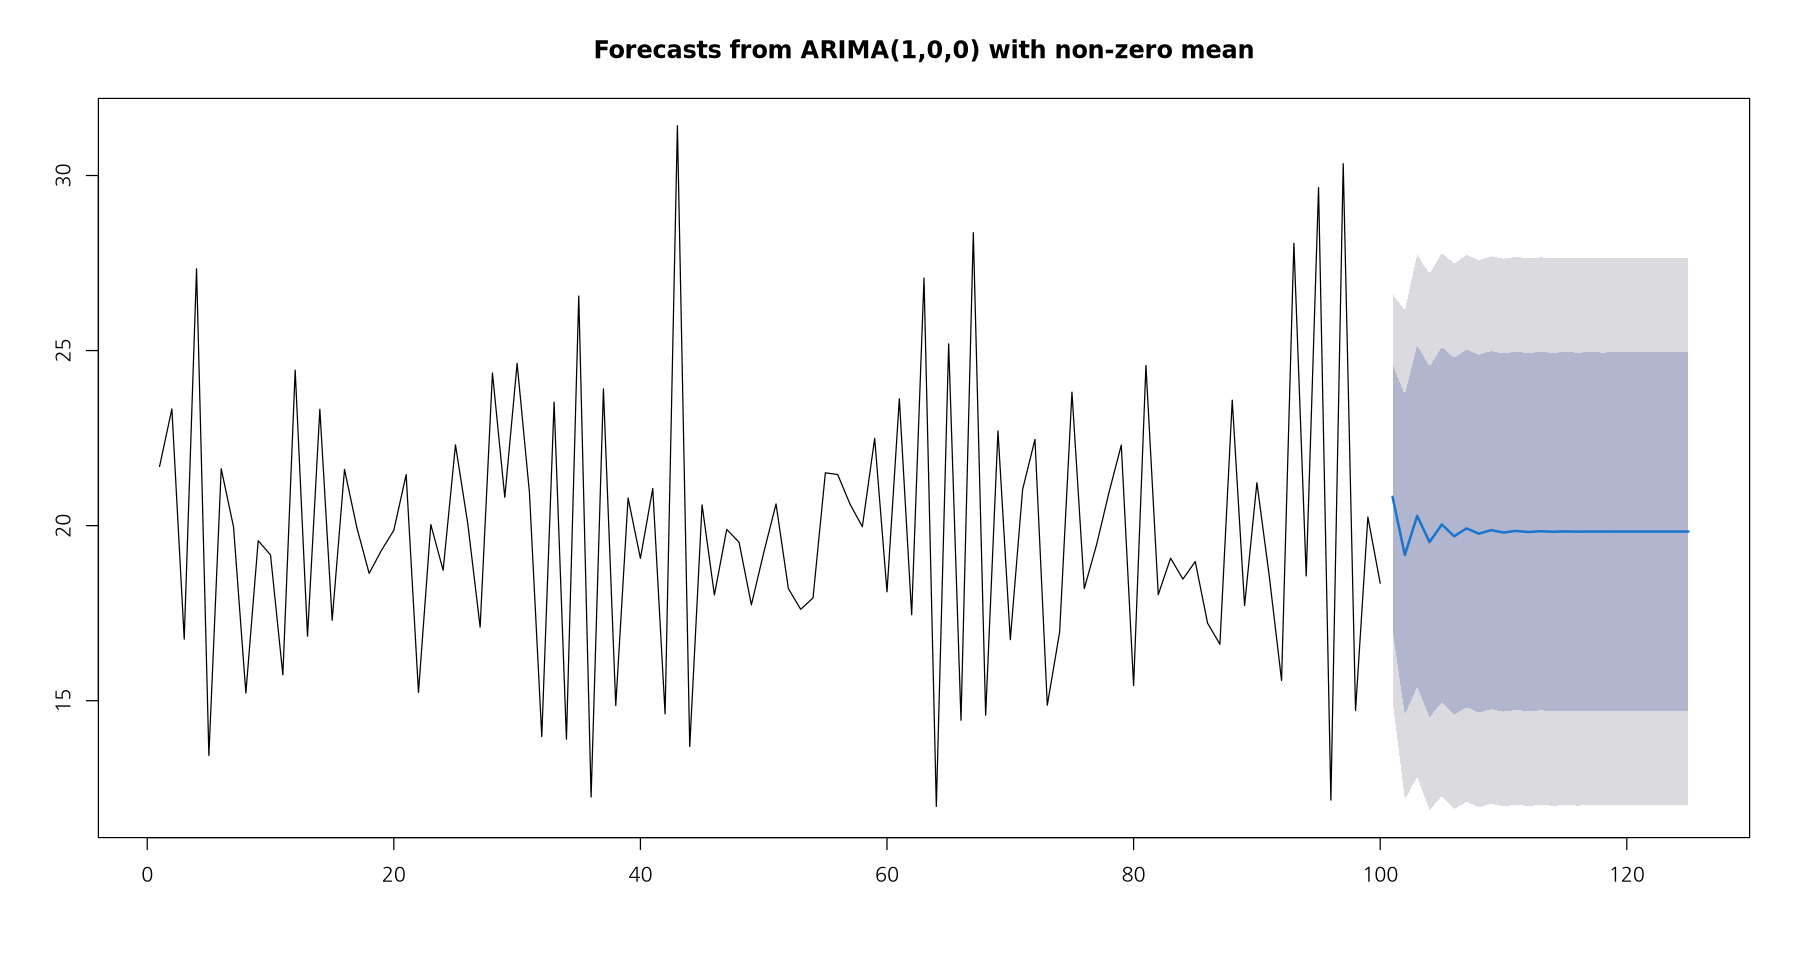

In [19]:
plot(forecast_fit)

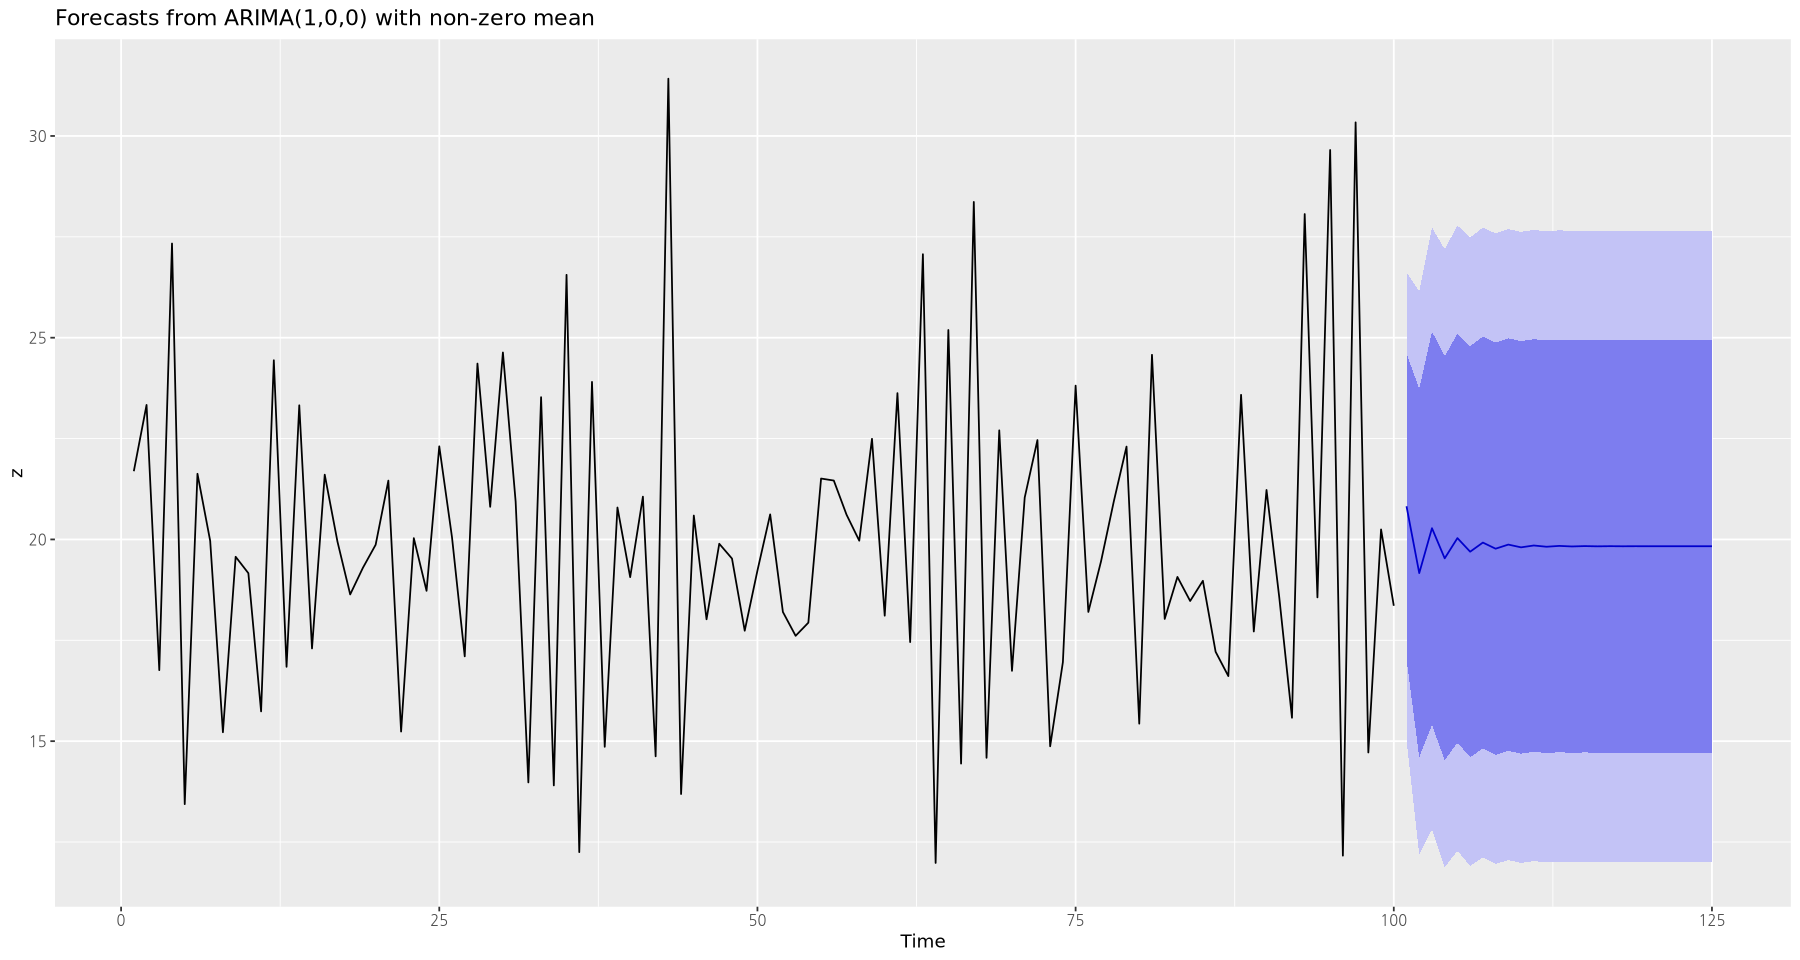

In [20]:
ggplot2::autoplot(forecast_fit)

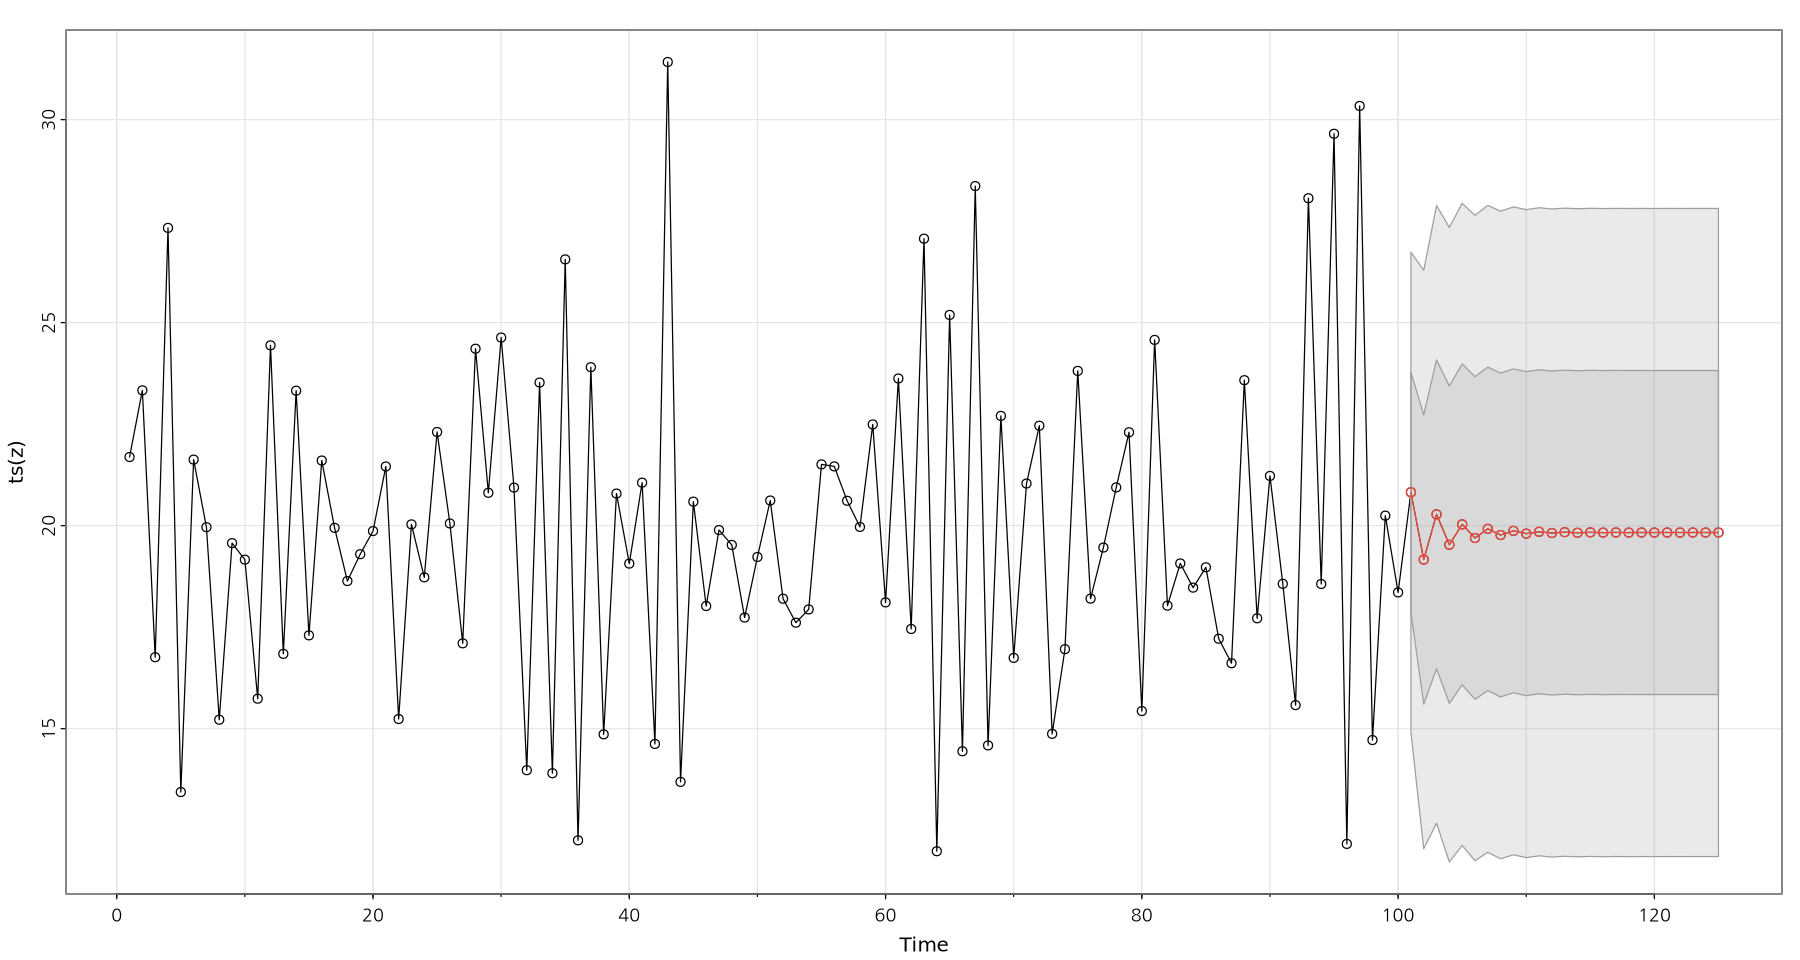

In [15]:
sarima_fit <- astsa::sarima.for(ts(z),25,1,0,0)

> $\phi$가 음수이다 보니까, 올라갔다 내려갔다 함. 나중엔 평균으로 수렴하게 됨 ㅇㅇ

In [21]:
sarima_fit$pred
sarima_fit$se

A Time Series:
 [1] 20.82225 19.16558 20.27811 19.53100 20.03271 19.69579 19.92205 19.77011
 [9] 19.87214 19.80362 19.84964 19.81874 19.83949 19.82555 19.83491 19.82863
[17] 19.83285 19.83001 19.83191 19.83064 19.83149 19.83092 19.83131 19.83105
[25] 19.83122

A Time Series:
 [1] 2.957007 3.561901 3.803344 3.907350 3.953359 3.973933 3.983176 3.987338
 [9] 3.989213 3.990059 3.990440 3.990612 3.990690 3.990724 3.990740 3.990747
[17] 3.990751 3.990752 3.990753 3.990753 3.990753 3.990753 3.990753 3.990753
[25] 3.990753

> 예측값과 표준오차. 신뢰구간을 구할 수 있음.

In [22]:
head(sarima_fit$pred + qnorm(0.975)*sarima_fit$se) ##95% 신뢰구간 상한
head(sarima_fit$pred - qnorm(0.975)*sarima_fit$se) ##95% 신뢰구간 하한

A Time Series:
[1] 26.61788 26.14678 27.73252 27.18926 27.78116 27.48456

A Time Series:
[1] 15.02662 12.18439 12.82369 11.87273 12.28427 11.90703

> 위에서 구한 것과 동일함 ㅇㅇ

## 9.5

`geom_smooth()` using formula = 'y ~ x'


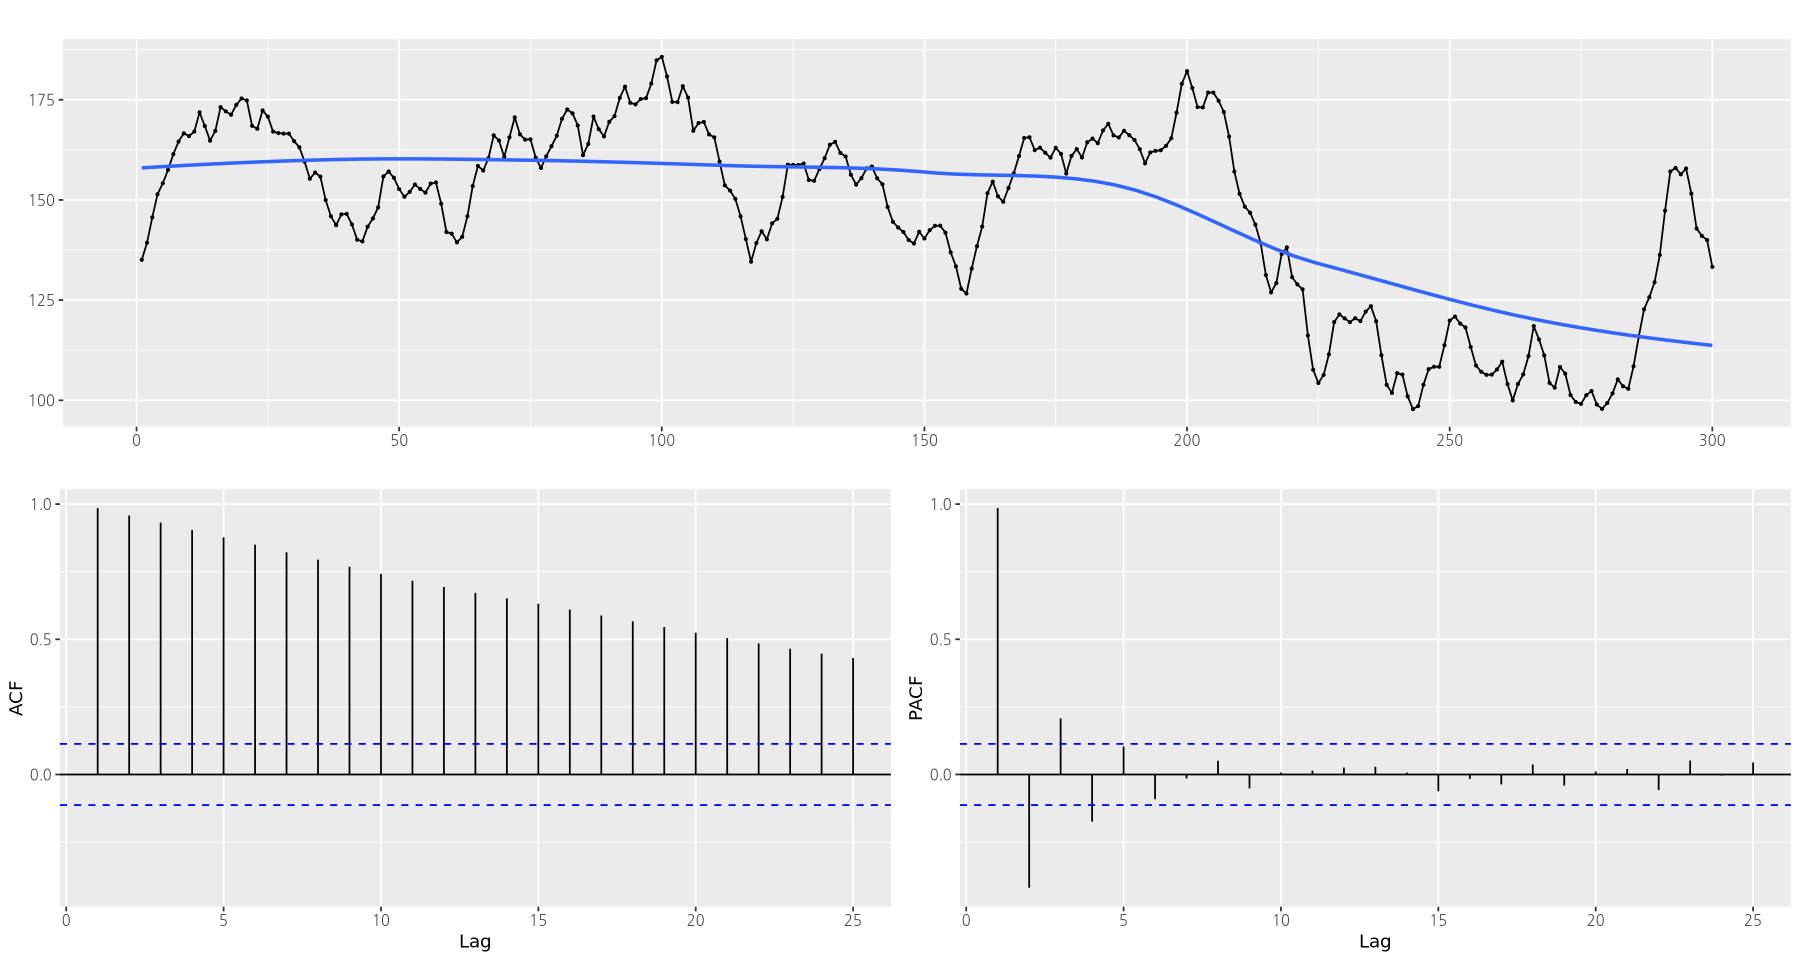

In [24]:
z <- scan("/root/TS2024/data/Time Series Data/eg9_5.txt")
forecast::ggtsdisplay(z, smooth=T)

> ACF는 아주 천천히 감소 -> 확률적 추세
>
> PACF는 사인함수를 그리며 지수적으로 감소 -> MA 모형

In [25]:
##단위근 검정 : H0 : 단위근이 있다.
fUnitRoots::adfTest(z, lags = 0, type = "c") ## 평균이 0이 아니고, 결정적 추세가 없음
fUnitRoots::adfTest(z, lags = 1, type = "c")
fUnitRoots::adfTest(z, lags = 2, type = "c")


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -1.43
  P VALUE:
    0.5246 

Description:
 Wed Nov 27 17:20:09 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -2.3543
  P VALUE:
    0.1803 

Description:
 Wed Nov 27 17:20:09 2024 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -1.7307
  P VALUE:
    0.4126 

Description:
 Wed Nov 27 17:20:09 2024 by user: 

`-` 차분 진행

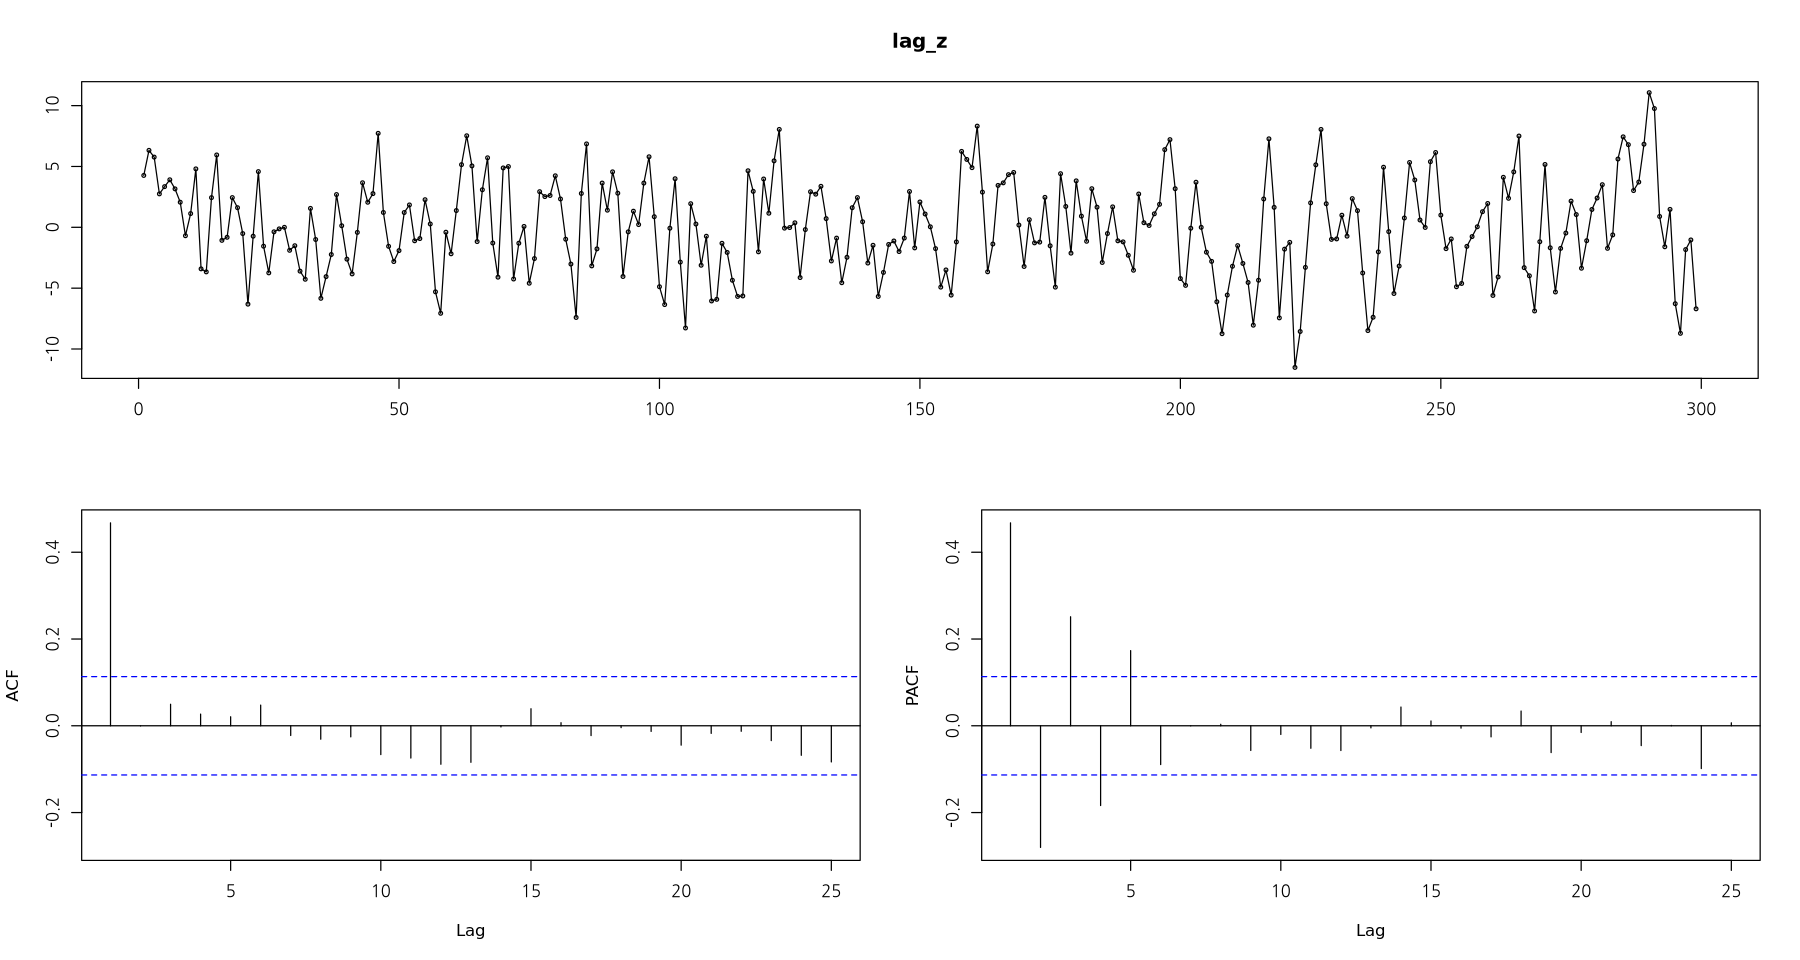

In [26]:
lag_z <- diff(z)
forecast::tsdisplay(lag_z)

> ACF는 1시차에서만 유의하고 이후 절단 형태
>
> PACF는 지수적으로 감소
>
> MA(1) 모형이라고 할 수 있음.

In [27]:
t.test(lag_z) ## 차분한 데이터의 평균은 0임.


	One Sample t-test

data:  lag_z
t = -0.02617, df = 298, p-value = 0.9791
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4480209  0.4362617
sample estimates:
   mean of x 
-0.005879599 


`-` 차분한 데이터 모형 적합

In [28]:
fit1 = arima(lag_z, order = c(0, 0, 1), include.mean = F)
fit1


Call:
arima(x = lag_z, order = c(0, 0, 1), include.mean = F)

Coefficients:
         ma1
      0.7605
s.e.  0.0342

sigma^2 estimated as 9.479:  log likelihood = -760.93,  aic = 1525.86

`-` 오리지널 데이터 적합

In [29]:
fit = arima(z, order = c(0, 1, 1)) ## Z ~ ARIMA(0, 1, 1)
fit


Call:
arima(x = z, order = c(0, 1, 1))

Coefficients:
         ma1
      0.7605
s.e.  0.0342

sigma^2 estimated as 9.479:  log likelihood = -760.93,  aic = 1525.86

> 무얼 하나 결과는 당연히 동일. 애초에 차분하고 넣은거니까

`-` 모형 명시

$\nabla Z_t = \varepsilon_t + 0.7605 \varepsilon_{t-1} \Rightarrow Z_t = Z_{t-1} + \varepsilon_t + 0.7605 \varepsilon_{t-1}$

$(1-B)Z_t = \varepsilon_t + 0.7605 \varepsilon_{t-1} = (1+0.7605B)\varepsilon_t$

$\hat \theta = -0.7605, ~ \hat \sigma^2 = 9.479$

`-` 잔차 검정


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 7.1117, df = 9, p-value = 0.6255

Model df: 1.   Total lags used: 10



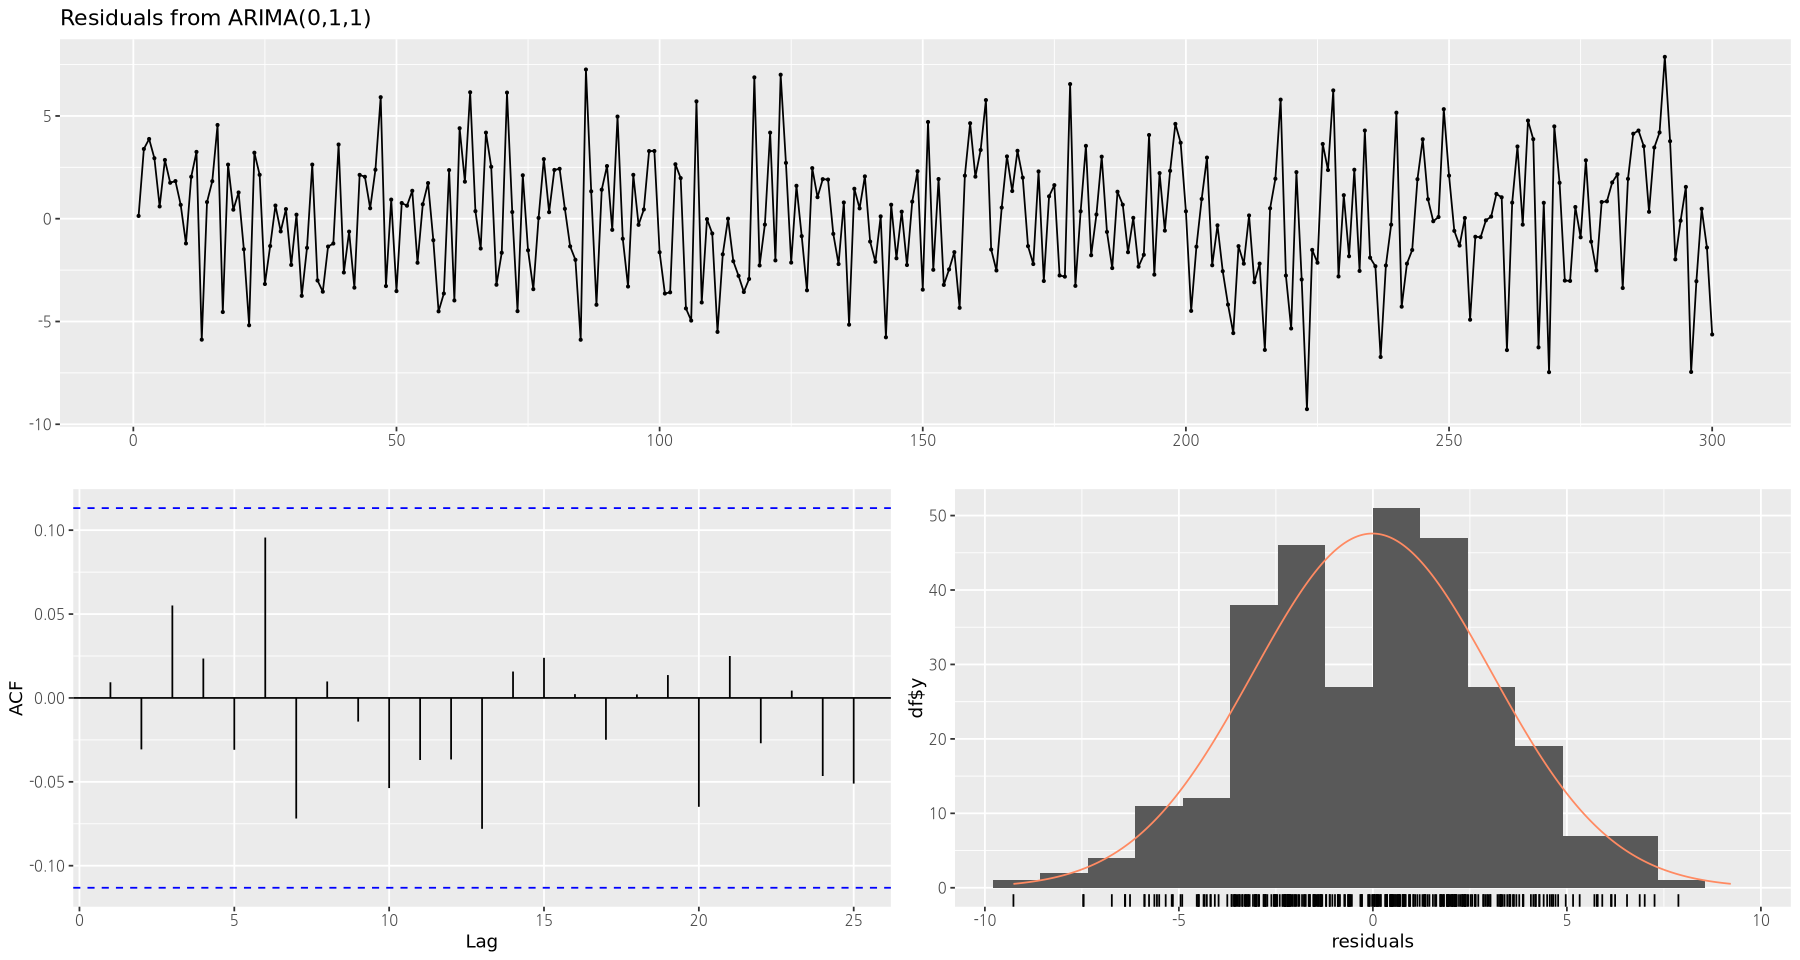

In [30]:
forecast::checkresiduals(fit)

> 0을 중심으로 대칭
>
> ACF는 모든 시차에서 유의하지 않음
>
> 히스토그램도 나름 정규분포 -

* 잔차의 포트맨토 검정

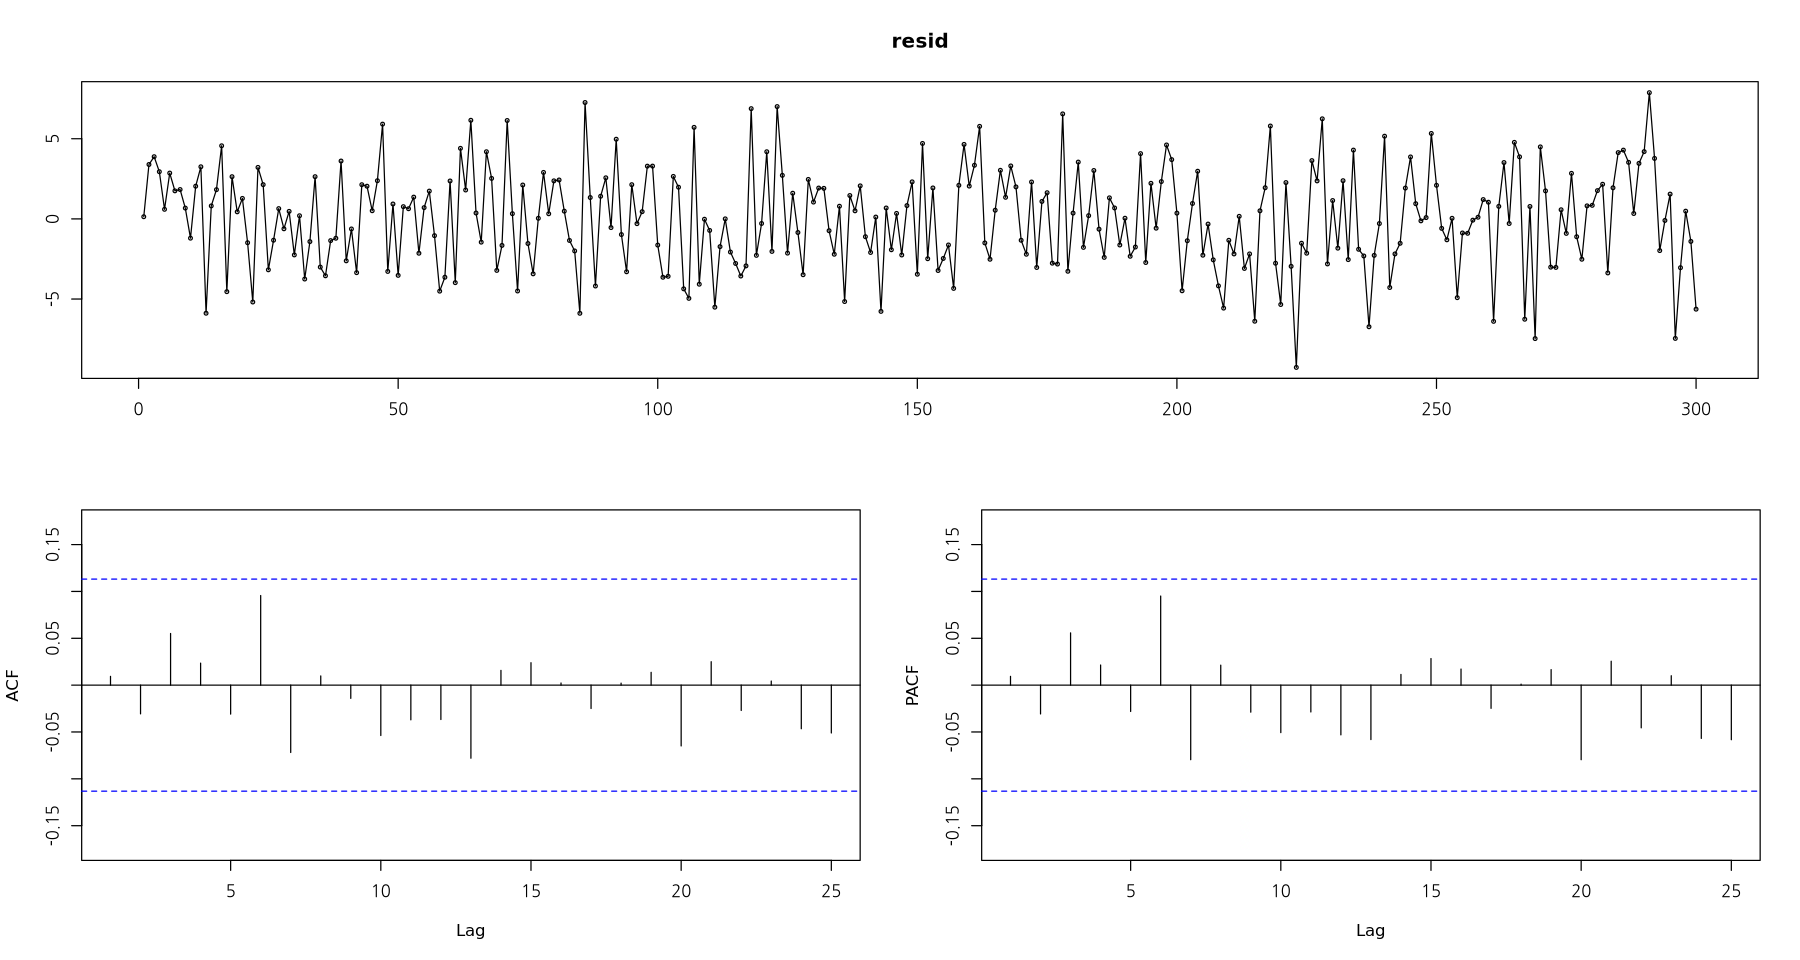

In [31]:
resid = resid(fit)
forecast::tsdisplay(resid)

In [32]:
# 잔차의 포트맨토 검정 ## H0 : rho1=...=rho_k=0
portes::LjungBox(fit, lags=c(6,12,18,24))

,lags,statistic,df,p-value
,6,4.520231,5,0.4771812
,12,7.964175,11,0.7165093
,18,10.346863,17,0.8884381
,24,12.926680,23,0.9535620


In [33]:
## 정규성검정
tseries::jarque.bera.test(resid) ##JB test H0: normal


	Jarque Bera Test

data:  resid
X-squared = 1.1606, df = 2, p-value = 0.5597


initial  value 1.355425 
iter   2 value 1.182804
iter   3 value 1.144176
iter   4 value 1.129179
iter   5 value 1.127095
iter   6 value 1.125914
iter   7 value 1.125753
iter   8 value 1.125727
iter   9 value 1.125726
iter  10 value 1.125726
iter  11 value 1.125726
iter  11 value 1.125726
final  value 1.125726 
converged
initial  value 1.125981 
iter   2 value 1.125979
iter   3 value 1.125977
iter   4 value 1.125975
iter   5 value 1.125974
iter   6 value 1.125974
iter   6 value 1.125974
final  value 1.125974 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
         Estimate     SE t.value p.value
ma1        0.7605 0.0342 22.2124  0.0000
constant  -0.0146 0.3130 -0.0468  0.9627

sigma^2 estimated as 9.478812 on 297 degrees of freedom 
 
AIC = 5.109891  AICc = 5.110027  BIC = 5.14702 
 


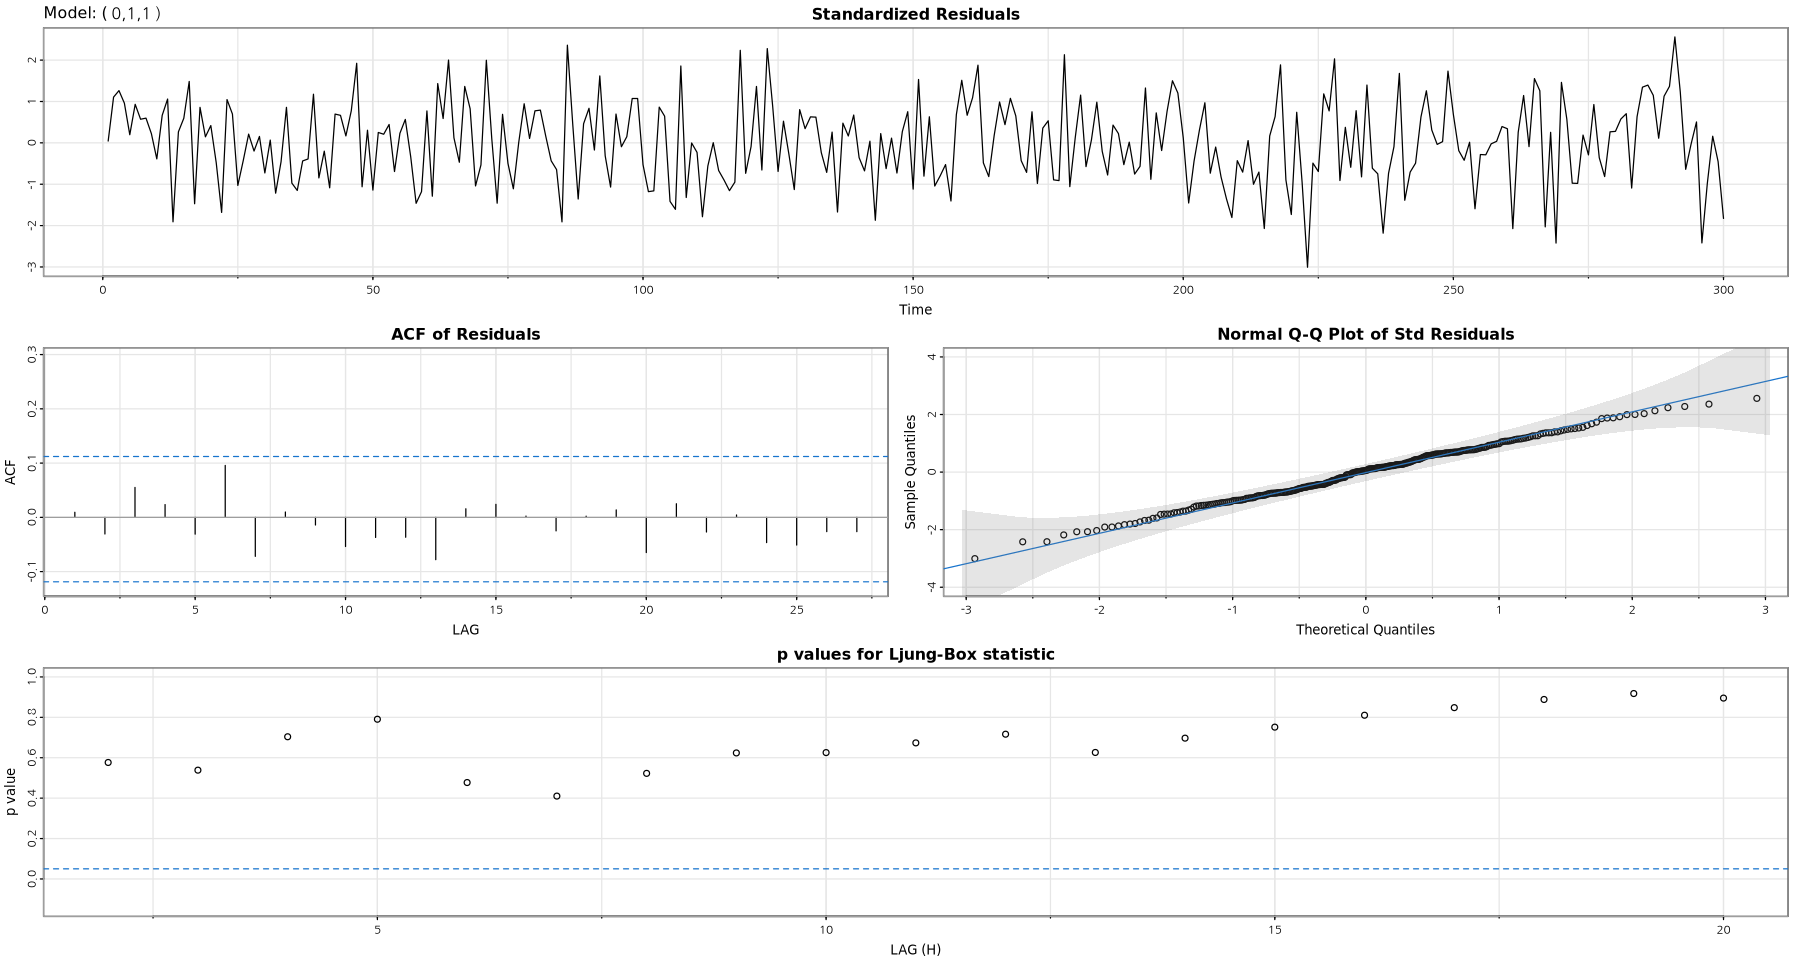

In [34]:
## 잔차 검정
astsa::sarima(z, p=0, d=1, q=1)

> 다 할 필요는 없어요. 이 중에서 하나만 골라서 하면 됩니다. (그냥 마지막이랑 포트맨토 검정 정도까지만 하면 될듯)

`-` forecasting

In [35]:
#차분한 시계열에 대한 예측
fore_fit1 <- forecast::forecast(fit1, 25)
fore_fit1

    Point Forecast     Lo 80      Hi 80      Lo 95    Hi 95
300      -4.282901 -8.228516 -0.3372864 -10.317199 1.751396
301       0.000000 -4.956954  4.9569540  -7.581007 7.581007
302       0.000000 -4.956954  4.9569540  -7.581007 7.581007
303       0.000000 -4.956954  4.9569540  -7.581007 7.581007
304       0.000000 -4.956954  4.9569540  -7.581007 7.581007
305       0.000000 -4.956954  4.9569540  -7.581007 7.581007
306       0.000000 -4.956954  4.9569540  -7.581007 7.581007
307       0.000000 -4.956954  4.9569540  -7.581007 7.581007
308       0.000000 -4.956954  4.9569540  -7.581007 7.581007
309       0.000000 -4.956954  4.9569540  -7.581007 7.581007
310       0.000000 -4.956954  4.9569540  -7.581007 7.581007
311       0.000000 -4.956954  4.9569540  -7.581007 7.581007
312       0.000000 -4.956954  4.9569540  -7.581007 7.581007
313       0.000000 -4.956954  4.9569540  -7.581007 7.581007
314       0.000000 -4.956954  4.9569540  -7.581007 7.581007
315       0.000000 -4.956954  4.9569540 

$Z_t \sim MA(1)$이라면,

$Z_n(l) = -\theta \varepsilon_n, ~ l = 1, 0, ~ l ≥ 2$

$Z_{299}(1) = -\theta \varepsilon_{299}$

> $\varepsilon$은 관측할 수가 없지만, 가역성에 의해 $Z_t$들의 선형 결합으로 나타낼 수 있음.

$\varepsilon_n = (1-\theta B)Z_t = \sum_{j=0}^\inf \theta^jZ_{n-j}$

$\hat\varepsilon_n = (1-\hat\theta B)Z_t = \sum_{j=0}^\inf \hat\theta^j Z_{n-j}$

In [36]:
theta = -0.7605
sum(theta^(0:298) * lag_z[299:1]) * (-theta) ## 차분한 시계열의 예측값과 동일

[1] -4.28298

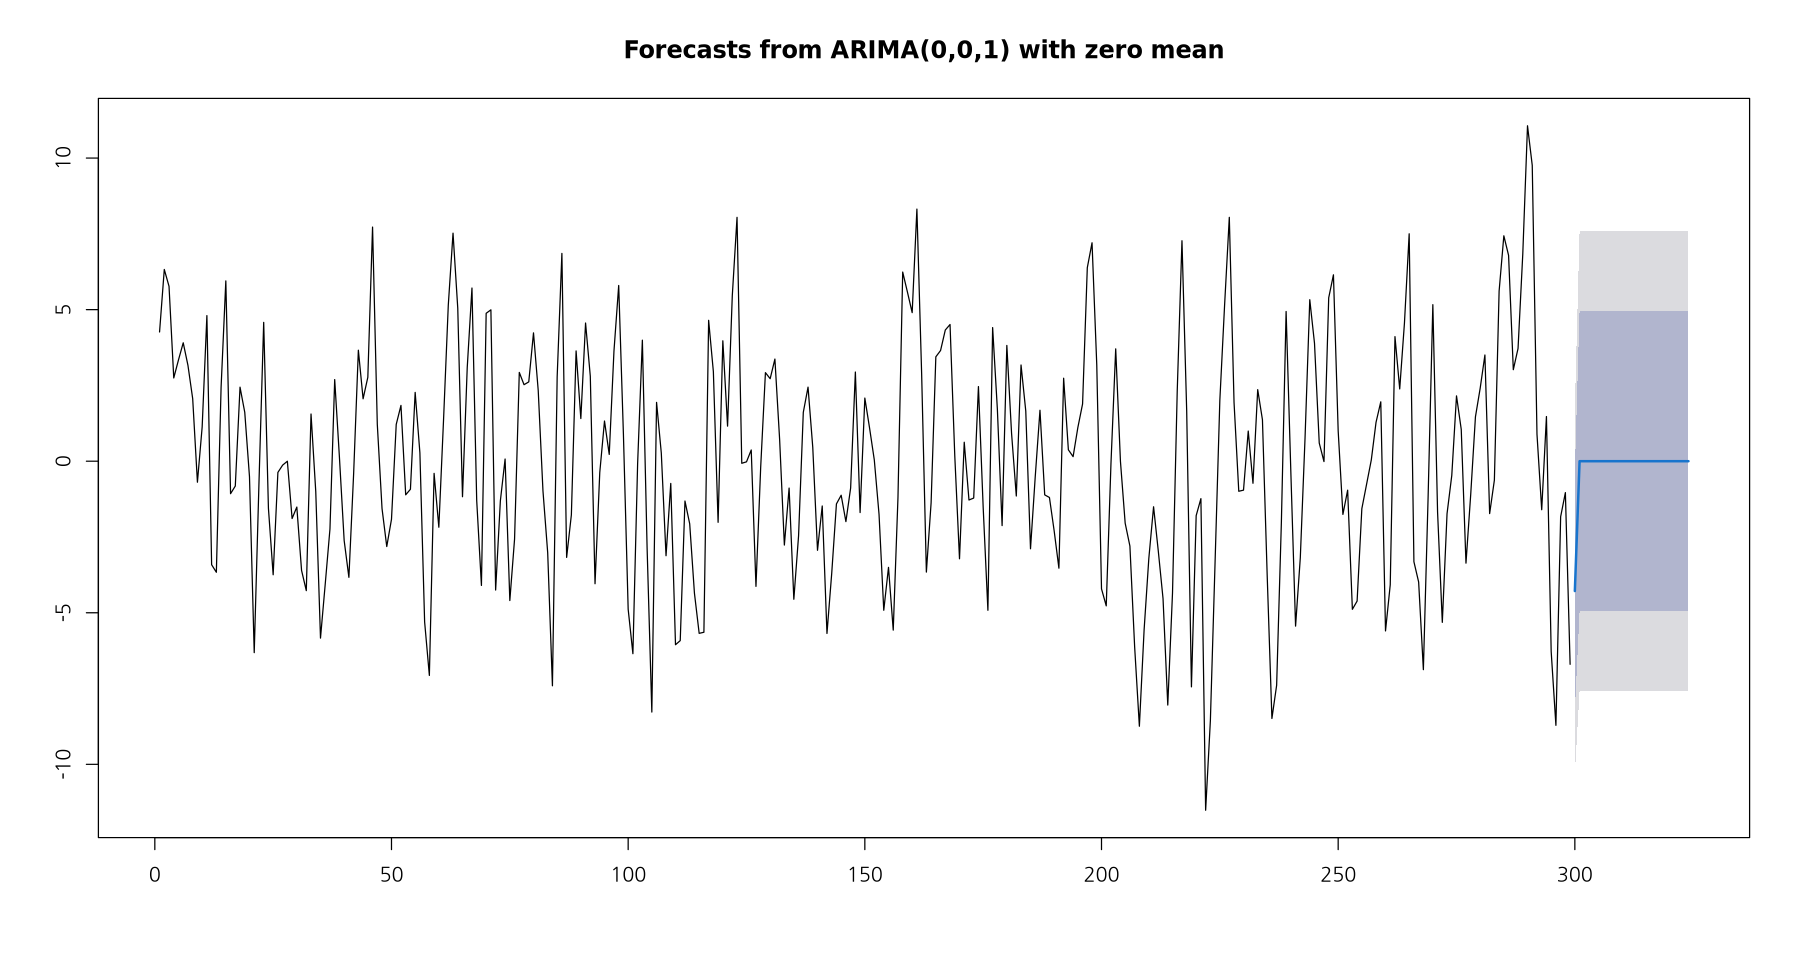

In [38]:
plot(fore_fit1)

> 한 시차만 올라가고 나머지는 평균으로 쭉

In [37]:
#원래 데이터인 z에 대한 예측
fore_fit <- forecast::forecast(fit, 25)
fore_fit

    Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
301       129.0191 125.07348 132.9647 122.98480 135.0534
302       129.0191 121.03051 137.0077 116.80160 141.2366
303       129.0191 118.43291 139.6053 112.82893 145.2093
304       129.0191 116.35746 141.6807 109.65480 148.3834
305       129.0191 114.57726 143.4609 106.93221 151.1060
306       129.0191 112.99361 145.0446 104.51022 153.5280
307       129.0191 111.55296 146.4852 102.30694 155.7313
308       129.0191 110.22240 147.8158 100.27203 157.7662
309       129.0191 108.98000 149.0582  98.37194 159.6663
310       129.0191 107.81025 150.2279  96.58297 161.4552
311       129.0191 106.70173 151.3365  94.88763 163.1506
312       129.0191 105.64572 152.3925  93.27261 164.7656
313       129.0191 104.63541 153.4028  91.72746 166.3107
314       129.0191 103.66532 154.3729  90.24384 167.7944
315       129.0191 102.73101 155.3072  88.81493 169.2233
316       129.0191 101.82878 156.2094  87.43509 170.6031
317       129.0191 100.95554 15

$\widehat{\nabla Z_t} = \hat Z_t - \hat Z_{t-1}$

$\hat Z_t = \widehat{\nabla Z_t} + \hat Z_{t-1}$

$\hat Z_{300}(1) = \widehat {\nabla Z_{300}(1)} + Z_{300}$

그 뒤로부터는 차분된 값이 전부 0이라서... 똑같은 값이 계속 반복되고 있음.

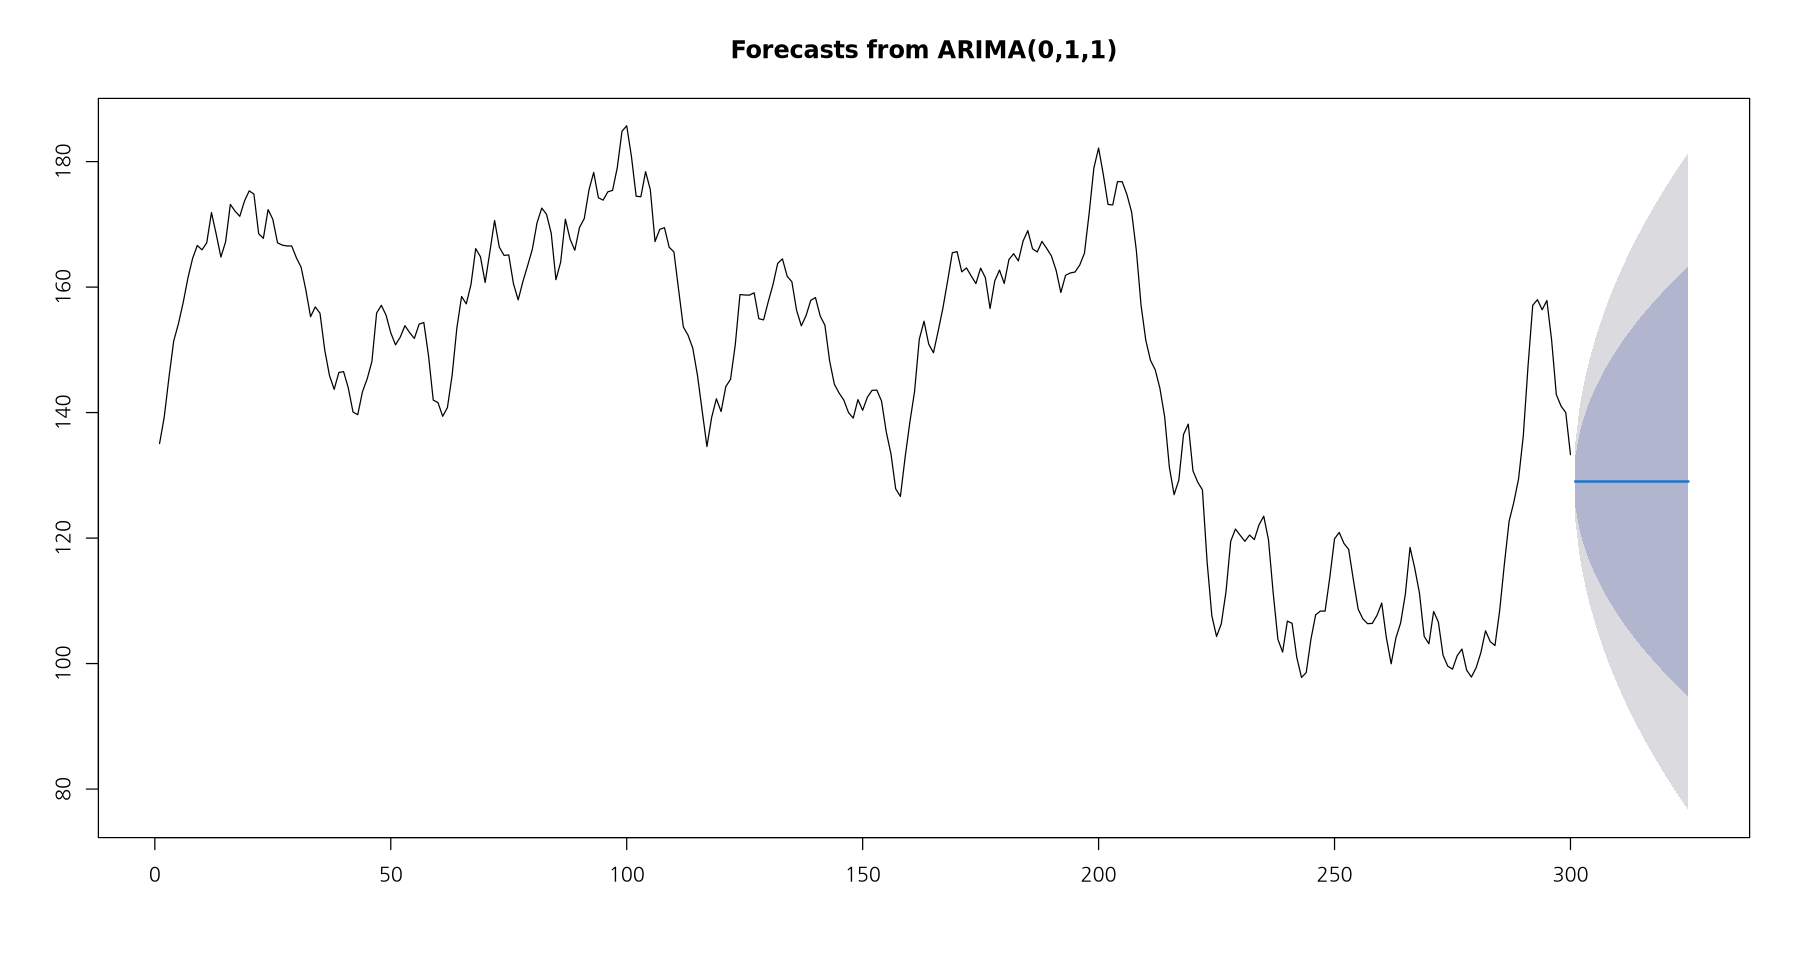

In [39]:
plot(fore_fit)

> 차분을 했으면 분산이 커지기 때문에, confidence interval이 계속 증가한다.
>
> MA는 원래 Plat하게 나옴, 하지만 차분을 했기 때문에 분산이 계속 커짐. 일단 동전던지기이기 때문에, 예측이 불가능함.